In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv("../data/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [6]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [7]:
log_model.coef_

array([[-0.91653034,  3.4506941 ]])

In [8]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [9]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.9206666666666666

In [10]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[515,  82],
       [ 37, 866]], dtype=int64)

**Nota:**
A partir desta célula o curso apresenta uma funcao que foi descontinuada por isso tive de adaptar com o codigo que fui descobrir.

In [11]:
help(ConfusionMatrixDisplay)

Help on class ConfusionMatrixDisplay in module sklearn.metrics._plot.confusion_matrix:

class ConfusionMatrixDisplay(builtins.object)
 |  ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
 |  
 |  Confusion Matrix visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.ConfusionMatrixDisplay.from_predictions` to
 |  create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
 |  attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  confusion_matrix : ndarray of shape (n_classes, n_classes)
 |      Confusion matrix.
 |  
 |  display_labels : ndarray of shape (n_classes,), default=None
 |      Display labels for plot. If None, display labels are set from 0 to
 |      `n_classes - 1`.
 |  
 |  Attributes
 |  ----------
 |  im_ : matplotlib AxesImage
 |      Image representing the confusion matrix.
 |  
 |  text_ : nda

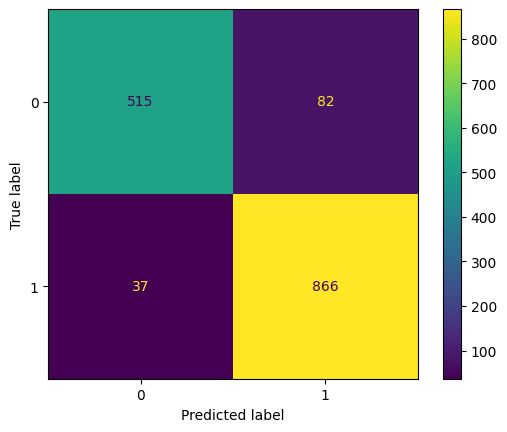

In [12]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot()

In [13]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [15]:
precision_score(y_test, y_pred)

0.9135021097046413

In [16]:
recall_score(y_test, y_pred)

0.9590254706533776

## Note
Mais uma vez o curso está desactualizado comparado com a versao corrente do sklearn.
O seguinte codigo foi uma adaptaçao do seguinte url
- [How to plot ROC Curve](https://www.statology.org/plot-roc-curve-python/)

In [17]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

In [18]:
fpr, tpr, _= roc_curve(y_test,  y_pred)

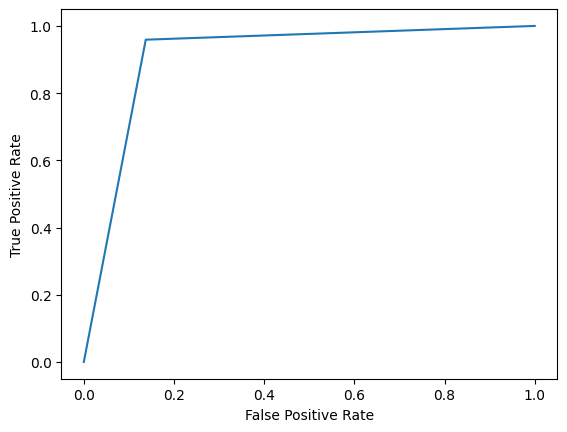

In [19]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()